In [1]:
## import dependencies
import pandas as pd
import numpy as np
from scipy import stats

# Visualization modules
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import squarify

In [2]:
## Load dataset
movies_df = pd.read_csv('rotten_tomatoes_movies.csv')
movies_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3


In [ ]:
# checking for missing information
movies_df.info(verbose = True)

In [7]:
# getting a stats report of the data
movies_df.describe(include = [np.object]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black' })

C:\Users\Qianna\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,count,unique,top,freq
rotten_tomatoes_link,16638,16638,/m/roberta,1
movie_title,16638,16106,Hamlet,5
movie_info,16614,16613,"An adaptation of the Broadway drama about Prince Charles' ascension to the throne following the death of his mother, Queen Elizabeth II.",2
critics_consensus,8309,8307,"Extinction has a few intriguing ideas, but they -- and some game performances from its talented stars -- are lost in the movie's muddled plot and frustrating pacing.",2
poster_image_url,16638,16623,/assets/pizza-pie/images/poster_default.c8c896e70c3.gif,15
rating,16638,8,R,6136
genre,16621,1080,Drama,1727
directors,16524,8314,Woody Allen,36
writers,15289,12121,Woody Allen,33
cast,16354,16326,Werner Herzog,4


In [ ]:
movies_df.describe(include = [np.number]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black'})

## How genre is distributed?

In [15]:
x = movies_df['genre'].value_counts()[:20]
x = x.sort_values()
x

Action & Adventure, Science Fiction & Fantasy     177
Classics, Drama                                   191
Action & Adventure, Mystery & Suspense            195
Action & Adventure                                199
Mystery & Suspense                                202
Comedy, Romance                                   257
Art House & International, Comedy, Drama          260
Drama, Romance                                    290
Comedy, Drama, Romance                            294
Horror, Mystery & Suspense                        308
Action & Adventure, Drama, Mystery & Suspense     317
Action & Adventure, Drama                         341
Horror                                            416
Documentary                                       420
Documentary, Special Interest                     540
Art House & International, Drama                  571
Drama, Mystery & Suspense                         683
Comedy, Drama                                     819
Comedy                      

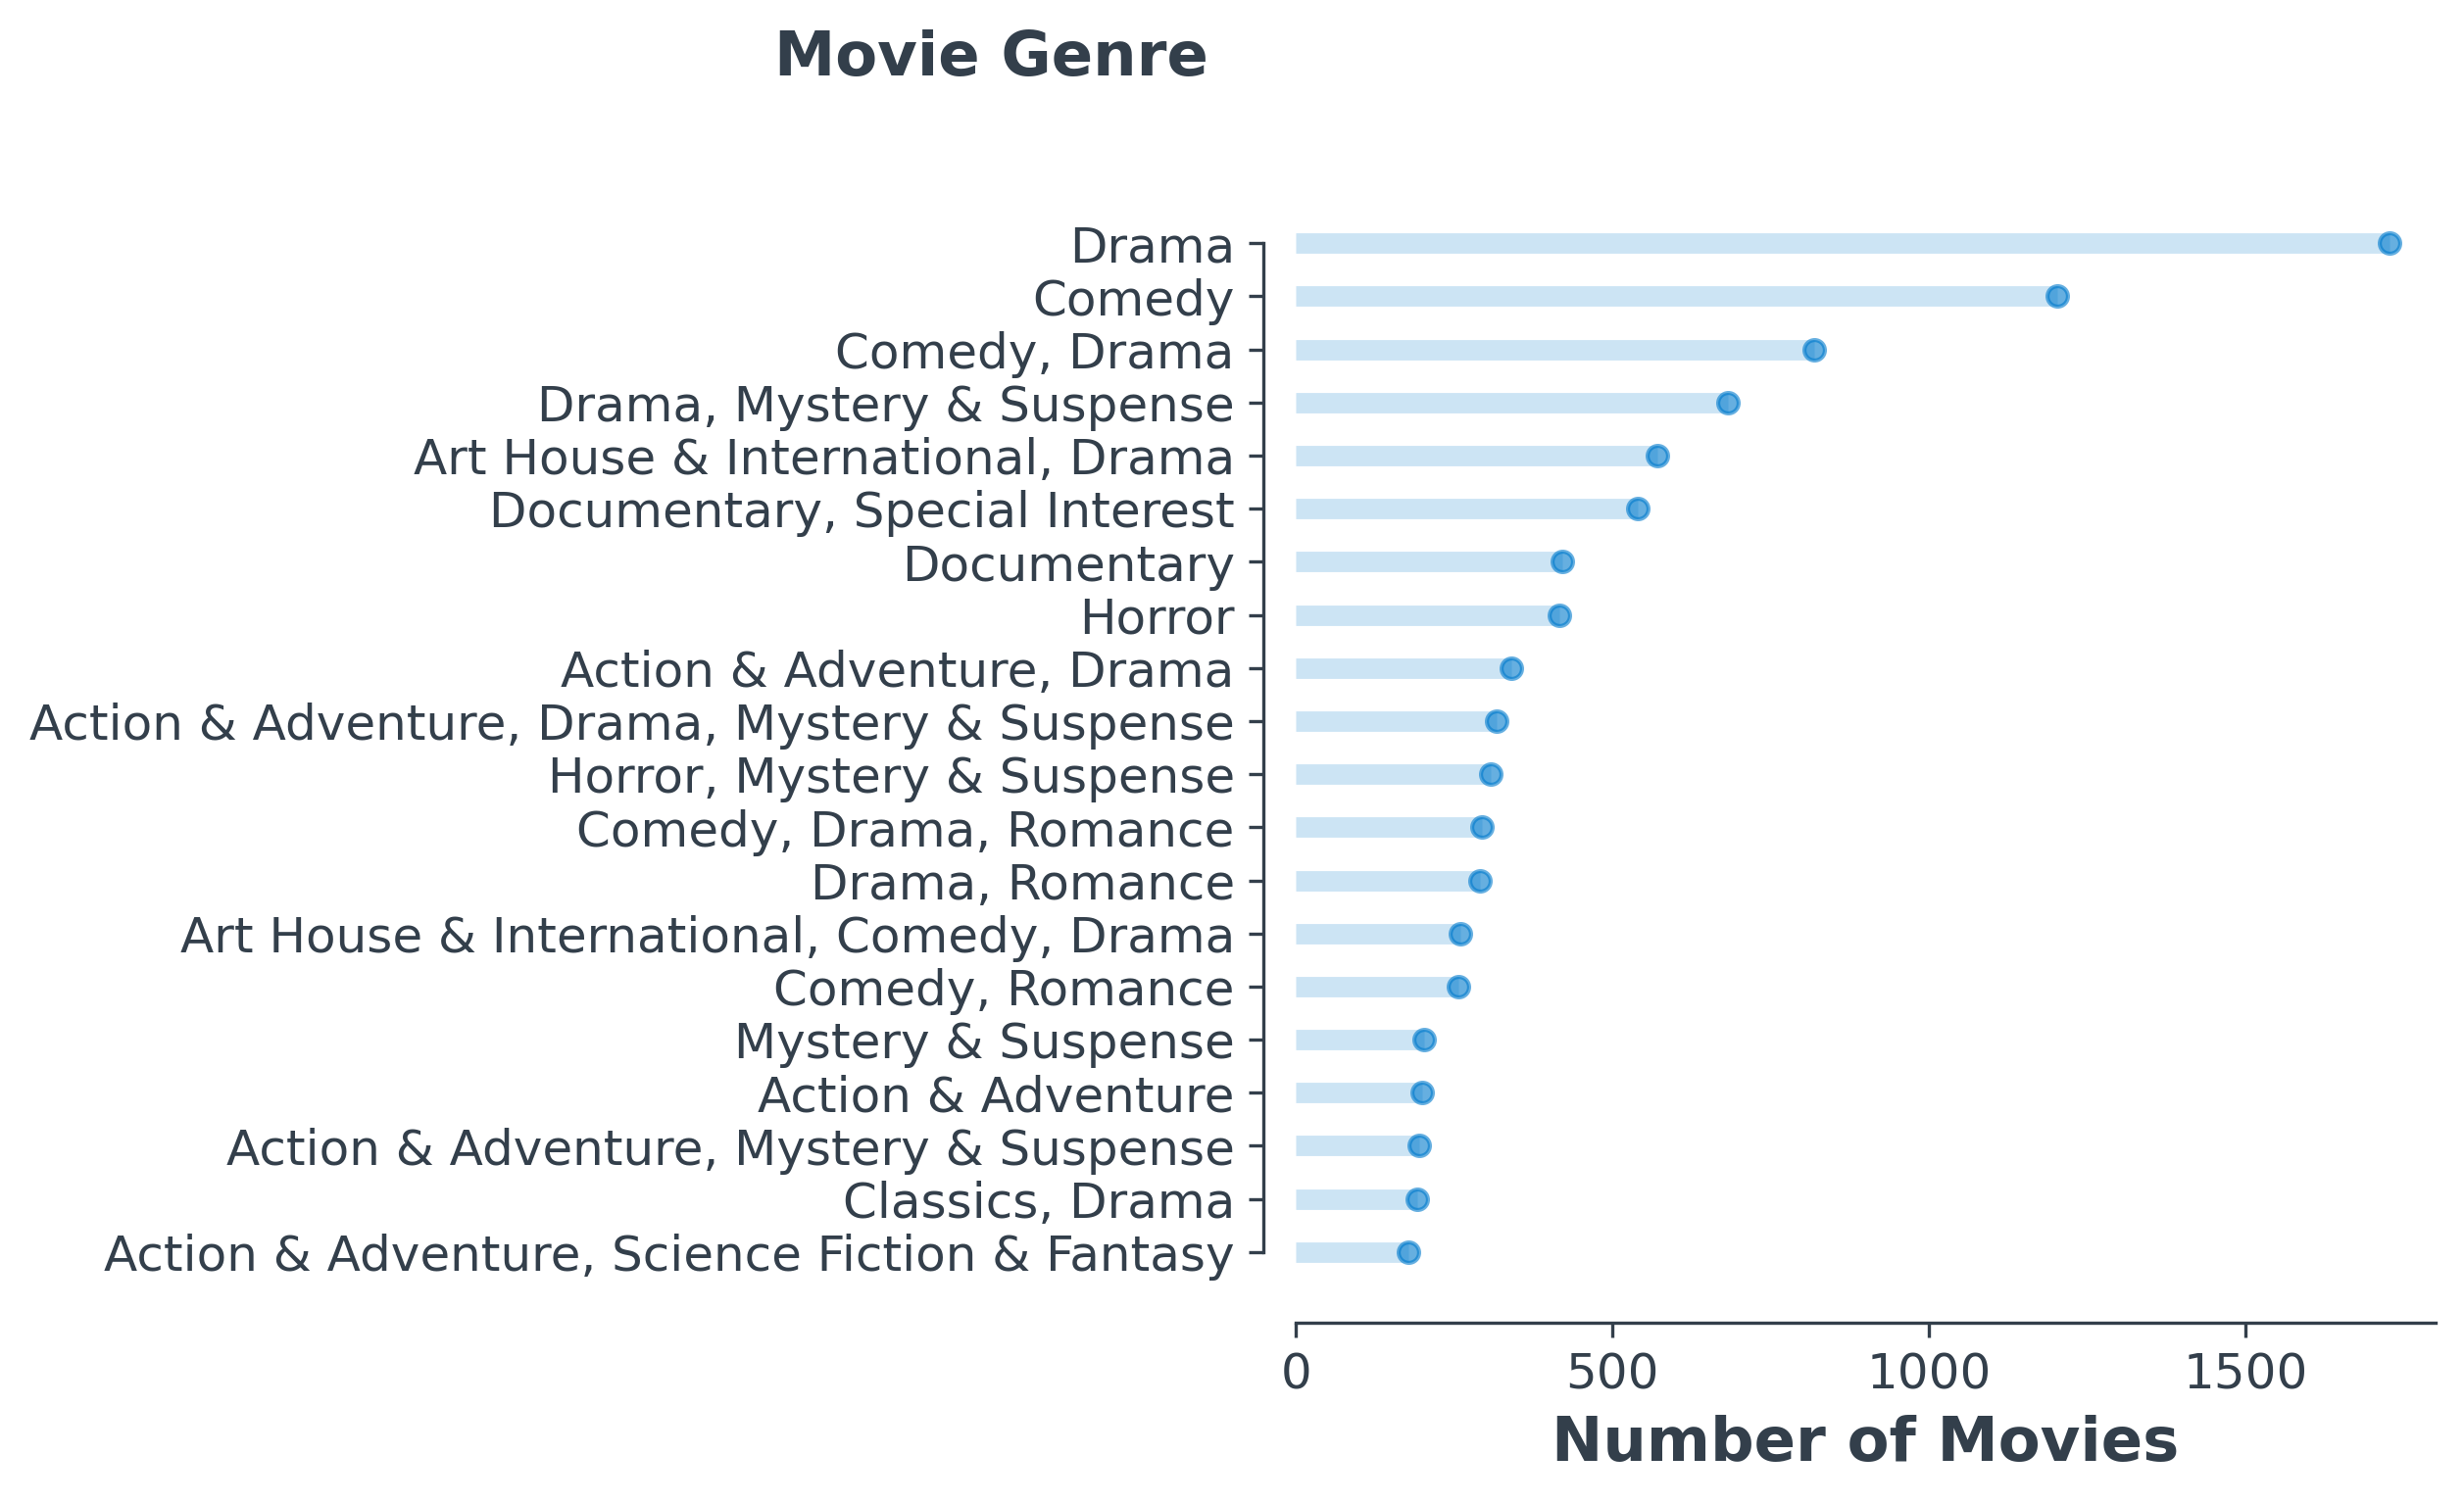

<Figure size 432x288 with 0 Axes>

In [21]:
# Set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

## set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(x.index)+1))

fig, ax = plt.subplots(figsize=(5,5), dpi=300)

plt.hlines(y=my_range, xmin=0, xmax=x.values, color='#007ACC', alpha=0.2, linewidth=5)
plt.plot(x.values, my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Number of Movies', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, x.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Movie Genre', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
ax.set_xlim(0,1800)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.show()
plt.savefig('genre.png', dpi=300, bbox_inches='tight')

In [ ]:
movies_df['genre'].value_counts()[:20].plot(kind='barh')

## Movie rating analysis

In [25]:
rating = {  'PG'    : 'Kids',
            'PG-13' : 'Teens',
            'R'     : 'Adults',
            'NC17' : 'Adults',
            'NR': 'Adults',
            'G': 'Kids'} 

#creating a new column with age rating
movies_df['age_rating'] = movies_df['rating'].replace(to_replace = rating)

age_ratings = movies_df['age_rating'].value_counts()
age_ratings

Adults    11036
Teens      2888
Kids       2714
Name: age_rating, dtype: int64

In [ ]:
from math import pi
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


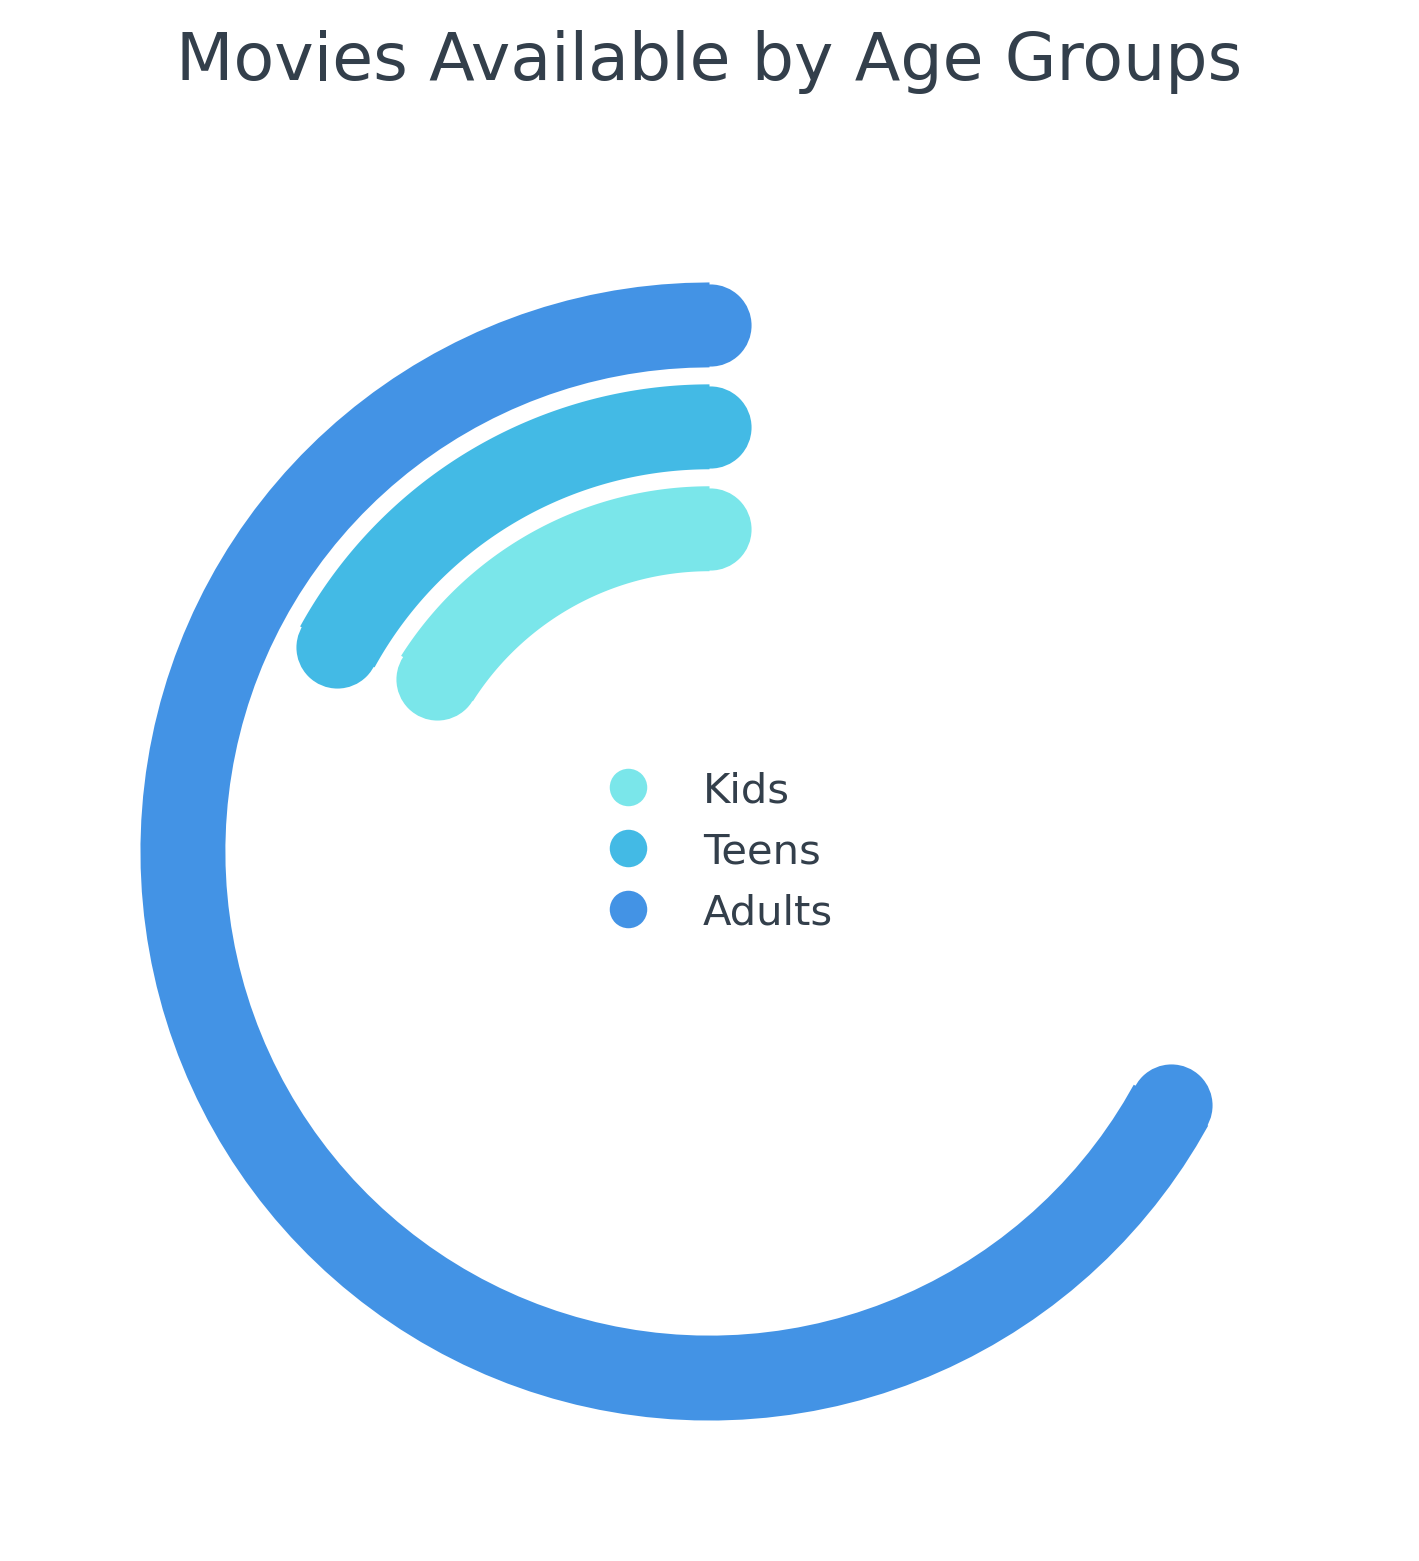

In [37]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
ax = plt.subplot(projection='polar')
data = [16, 17, 67]
startangle = 90
colors = ['#7AE6EA','#43BAE5', '#4393E5']
xs = [(i * pi *2)/ 100 for i in data]
ys = [-0.2, 1, 2.2]
left = (startangle * pi *2)/ 360 #this is to control where the bar starts

# plot bars and points at the end to make them round
for i, x in enumerate(xs):
    ax.barh(ys[i], x, left=left, height=1, color=colors[i])
    ax.scatter(x+left, ys[i], s=350, color=colors[i], zorder=2)
    ax.scatter(left, ys[i], s=350, color=colors[i], zorder=2)
    
plt.ylim(-4, 4)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Kids', markerfacecolor='#7AE6EA', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Teens', markerfacecolor='#43BAE5', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Adults', markerfacecolor='#4393E5', markersize=10)]
ax.legend(handles=legend_elements, loc='center', frameon=False)
# clear ticks, grids, spines
plt.xticks([])
plt.yticks([])
plt.title('Movies Available by Age Groups', fontsize=16)
ax.spines.clear()
plt.show()

## Which rating mostly available?

In [23]:
rating = movies_df['rating'].value_counts()
rating

R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: rating, dtype: int64

In [41]:
# Wierd values detected
# replace PG-13) with PG-13; R) with R
movies_df['rating'] = movies_df['rating'].replace('PG-13)', 'PG-13')
movies_df['rating'] = movies_df['rating'].replace('R)', 'R')
rating = movies_df['rating'].value_counts()
rating

R        6137
NR       4862
PG-13    2888
PG       2062
G         652
NC17       37
Name: rating, dtype: int64

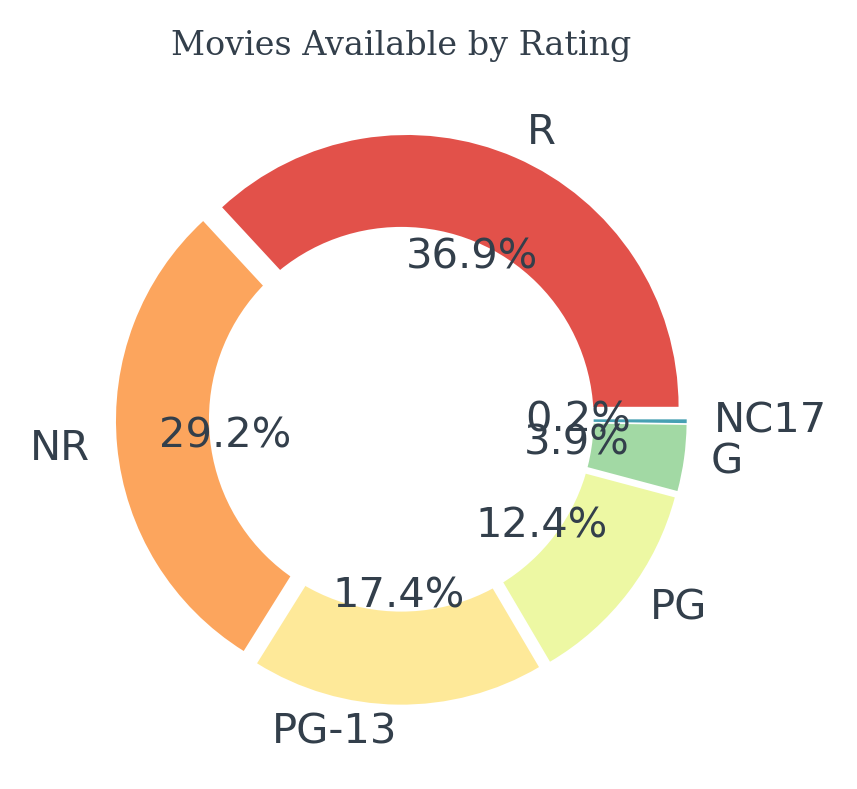

In [57]:
plt.subplots(figsize=(3, 3), dpi=300)
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
# Create a circle at the center of the plot
my_circle = plt.Circle((0, 0), 0.7, color='white')

plt.pie(rating, labels = rating.index, colors=sns.color_palette('Spectral', 6), autopct='%1.1f%%',
    explode = explode)

p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Movies Available by Rating", size = 8, fontfamily='serif')
plt.show()

## Studio analysis
### Which studio produce the most movies?

In [3]:
studio = movies_df.studio_name.value_counts()

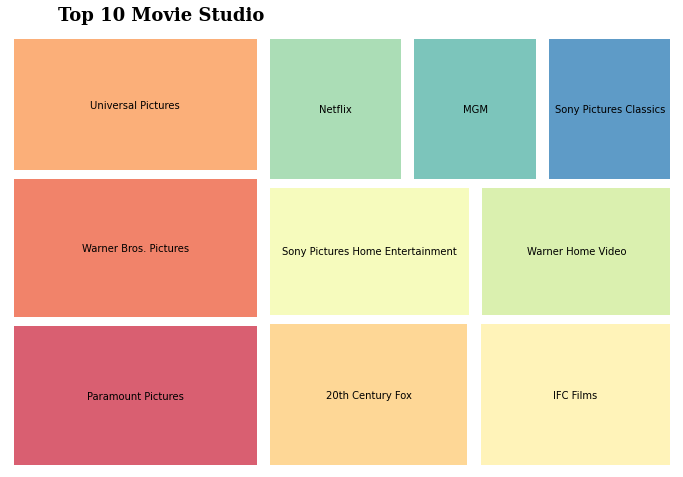

In [6]:
plt.figure(figsize=(12, 8))
squarify.plot(sizes = studio[0:10].values, label=studio[0:10].index, 
              color = sns.color_palette('Spectral', 10), alpha = 0.8, 
              text_kwargs={'fontsize':10},pad=2)
plt.title("Top 10 Movie Studio", size = 18, fontfamily='serif', fontweight='bold',
         position=(0.23, 1.0+0.02))
plt.axis('off')
plt.show()